# Влияние функций активации на классификацию

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import random as python_random

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Домашнее задание

In [3]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('binary_alpha_digits_images.npy')
Y = np.load('binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [4]:
X.shape, Y.shape

((1404, 20, 16), (1404,))

In [5]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [6]:
train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size=0.33, random_state=42)

In [7]:
train_images.shape, train_labels.shape

((940, 20, 16), (940,))

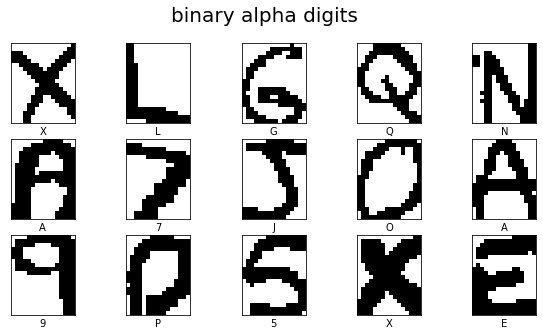

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[Y[n]])
    n += 1

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
hstr = model.fit(train_images, train_labels, epochs=15, verbose=2)

Epoch 1/15
30/30 - 1s - loss: 3.1537 - accuracy: 0.1872 - 812ms/epoch - 27ms/step
Epoch 2/15
30/30 - 0s - loss: 1.5615 - accuracy: 0.5585 - 86ms/epoch - 3ms/step
Epoch 3/15
30/30 - 0s - loss: 0.8872 - accuracy: 0.7245 - 83ms/epoch - 3ms/step
Epoch 4/15
30/30 - 0s - loss: 0.6483 - accuracy: 0.7936 - 83ms/epoch - 3ms/step
Epoch 5/15
30/30 - 0s - loss: 0.5121 - accuracy: 0.8468 - 83ms/epoch - 3ms/step
Epoch 6/15
30/30 - 0s - loss: 0.3429 - accuracy: 0.8989 - 81ms/epoch - 3ms/step
Epoch 7/15
30/30 - 0s - loss: 0.2490 - accuracy: 0.9266 - 91ms/epoch - 3ms/step
Epoch 8/15
30/30 - 0s - loss: 0.1557 - accuracy: 0.9511 - 86ms/epoch - 3ms/step
Epoch 9/15
30/30 - 0s - loss: 0.1051 - accuracy: 0.9702 - 81ms/epoch - 3ms/step
Epoch 10/15
30/30 - 0s - loss: 0.1039 - accuracy: 0.9670 - 83ms/epoch - 3ms/step
Epoch 11/15
30/30 - 0s - loss: 0.0973 - accuracy: 0.9681 - 83ms/epoch - 3ms/step
Epoch 12/15
30/30 - 0s - loss: 0.0660 - accuracy: 0.9691 - 84ms/epoch - 3ms/step
Epoch 13/15
30/30 - 0s - loss: 0.05

Epoch 15/15 \
30/30 - 0s - loss: 0.1012 - accuracy: 0.9734 - 55ms/epoch - 2ms/step \
 \
Epoch 15/15 \
30/30 - 0s - loss: 0.0592 - accuracy: 0.9798 - 89ms/epoch - 3ms/step

In [11]:
model.predict(test_images)

15/15 [==============================] - 0s 2ms/step


array([[  5.790786 ,  -6.623031 ,  -5.4492087, ...,  -8.570565 ,
         -7.14373  ,  -7.0066943],
       [ -7.0246854,  -2.1769693,  -7.3060737, ...,  -6.880194 ,
         -9.315853 ,  -6.1729565],
       [ -7.198002 ,   0.5269112,  -7.030087 , ...,  -3.2371294,
        -19.49459  , -12.538907 ],
       ...,
       [ -9.65537  ,  -3.8887668,  -5.726552 , ...,   2.3295112,
         -7.050435 , -12.5020485],
       [ -4.909892 ,  -0.6571645,  -5.3392076, ...,  -7.3221817,
         -8.832639 ,  -5.4588103],
       [ -1.1829181,  -5.061692 ,  -6.714485 , ...,  -5.29988  ,
         -6.0768185,  -4.971704 ]], dtype=float32)

In [12]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

15/15 [==============================] - 0s 2ms/step


In [13]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                  100*np.max(predictions_array),
                                  classes[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(36))
    plt.yticks([])
    thisplot = plt.bar(range(36), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

(20, 16)
(1, 20, 16)
1/1 [==============================] - 0s 18ms/step
[[3.35799194e-10 7.60266289e-07 3.97195554e-10 1.21288407e-12
  9.95619595e-01 1.11828923e-11 4.15925495e-03 2.19886891e-12
  1.67646808e-09 1.01616357e-14 3.57463108e-07 2.07954098e-09
  1.24274346e-09 1.30719446e-09 6.59629365e-11 3.95714184e-10
  4.14791612e-06 6.80480605e-09 4.42763159e-10 6.57374112e-13
  4.10735902e-06 1.26458952e-04 1.08835836e-10 3.91117828e-06
  9.89166304e-10 8.58144827e-13 2.81164447e-09 4.99273085e-08
  4.64243810e-10 1.17701083e-11 5.95512538e-05 7.42805684e-09
  2.16225690e-05 1.76305086e-08 1.53368603e-15 1.60899094e-12]]


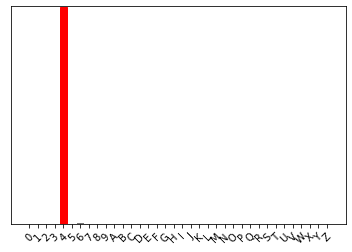

In [14]:
img = test_images[2]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(36), classes, rotation=45)

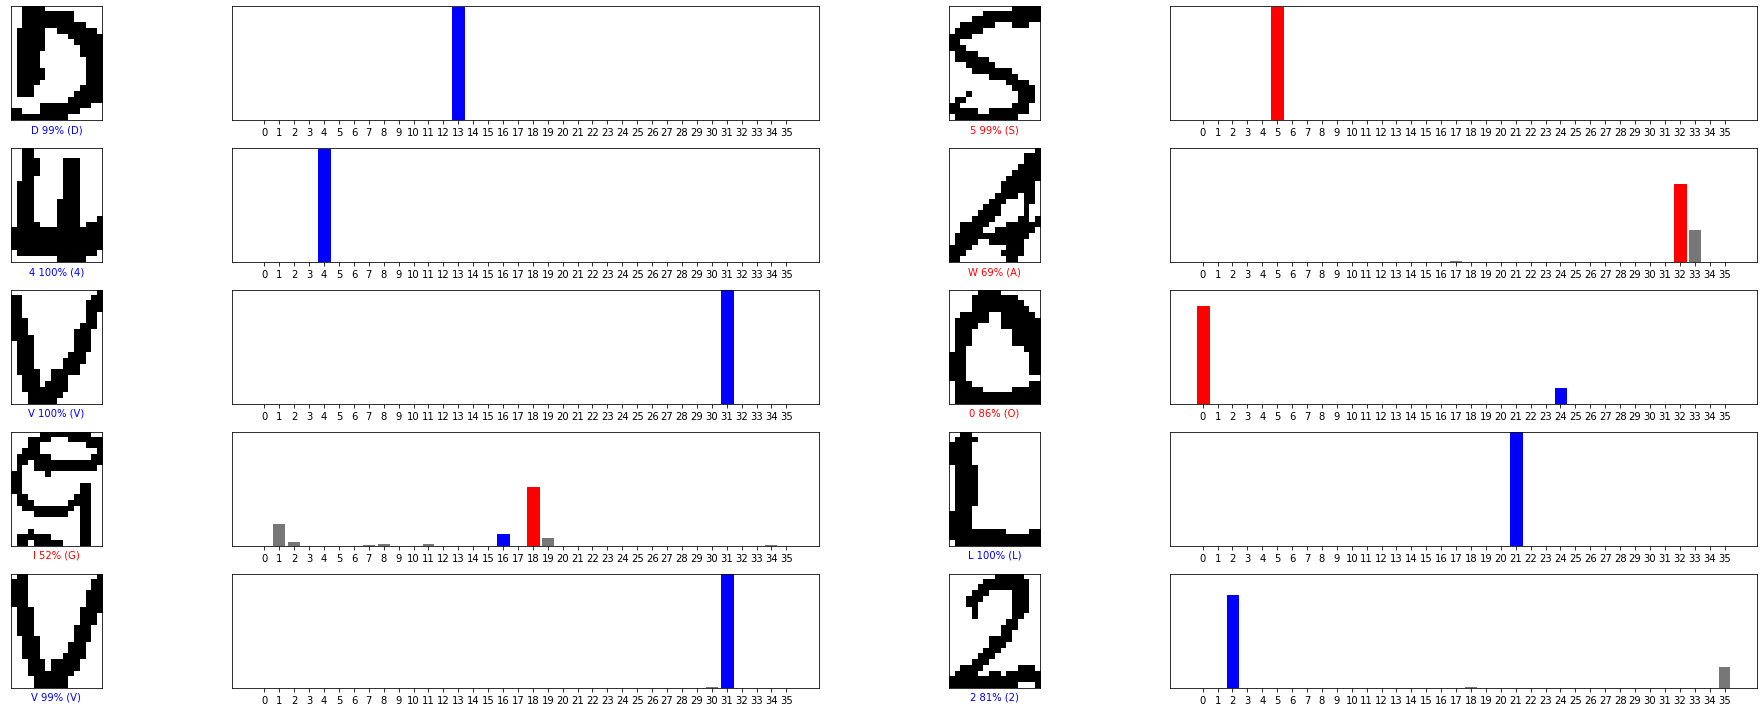

In [15]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(7*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Я пробовал по разному менять параметры модели, но ошибки устойчиво возникают в схожих местах. Часто путаются 0 и о, 5 и s. Буква g из-за своего сложного написания вообще с трудом распознается моделью. Я думаю для идеального распознования нужен больший датасет.  